In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install scikit-learn==1.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 82.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [3]:
!pip install xgboost==2.1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 93.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3


In [4]:
import sklearn 
import xgboost
print(sklearn.__version__)
print(xgboost.__version__)


1.6.1
2.1.4


In [5]:
import pandas as pd
from tqdm import tqdm  # optional: for progress bar

origin_comp_df = pd.read_csv("/kaggle/input/merge-comp-2021-new/ecg-comp-2021-signals-features.csv")

origin_comp_df.iloc[0]

record_name             training/georgia/g8/E07496
Duree_QRS_ms_mean                            168.8
Duree_QRS_ms_std                         17.364075
Duree_QRS_ms_min                             148.0
Duree_QRS_ms_max                             196.0
                                   ...            
std_Intervalle_RR_ms                     70.826862
Age                                           55.0
Sex                                         Female
Dx                                   ['426783006']
Class                                            0
Name: 0, Length: 100, dtype: object

In [6]:
origin_comp_df.columns

Index(['record_name', 'Duree_QRS_ms_mean', 'Duree_QRS_ms_std',
       'Duree_QRS_ms_min', 'Duree_QRS_ms_max', 'Duree_P_ms_mean',
       'Duree_P_ms_std', 'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean',
       'Duree_T_ms_std', 'Duree_T_ms_min', 'Duree_T_ms_max',
       'Intervalle_QT_ms_mean', 'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min',
       'Intervalle_QT_ms_max', 'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std',
       'Intervalle_PR_ms_min', 'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean',
       'Intervalle_ST_ms_std', 'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max',
       'Amplitude_P_mean', 'Amplitude_P_std', 'Amplitude_P_min',
       'Amplitude_P_max', 'Amplitude_Q_mean', 'Amplitude_Q_std',
       'Amplitude_Q_min', 'Amplitude_Q_max', 'Amplitude_R_mean',
       'Amplitude_R_std', 'Amplitude_R_min', 'Amplitude_R_max',
       'Amplitude_S_mean', 'Amplitude_S_std', 'Amplitude_S_min',
       'Amplitude_S_max', 'Amplitude_T_mean', 'Amplitude_T_std',
       'Amplitude_T_mi

In [7]:
origin_comp_df["Class"].value_counts()

Class
2    40705
0    28967
1    18559
Name: count, dtype: int64

# MIT-BIH norm

In [8]:
origin_mitbih_df = pd.read_csv("/kaggle/input/merge-norm-mitbih-new/norm-mit-signals-features.csv") 

In [9]:
origin_mitbih_df["Class"].value_counts()


Class
0    20233
Name: count, dtype: int64

# ecg arr

In [10]:
origin_ecgarr_df = pd.read_csv("/kaggle/input/ecg-arr-features/ecg-arr-signals-features.csv") 

origin_ecgarr_df["Class"].value_counts()


Class
2    20461
1    16553
0     8125
Name: count, dtype: int64

# challenge 2017


In [11]:
origin_ch2017_df = pd.read_csv("/kaggle/input/merge-challenge-2017-new/challenge-2017-signals-features.csv") 
len(origin_ch2017_df)


8527

In [12]:
origin_ch2017_df['Class'] = origin_ch2017_df['type'].apply(lambda x: 0 if x == 'N' else 2)
origin_ch2017_df = origin_ch2017_df.drop(columns=['type'])

In [13]:
origin_ch2017_df["Class"].value_counts()

Class
0    5075
2    3452
Name: count, dtype: int64

# full data

In [14]:
arr3 = [origin_comp_df,origin_mitbih_df]
#arr3 = [origin_comp_df]

sign_df = pd.concat(arr3, ignore_index=True)

In [15]:
arr4 = [origin_comp_df,origin_mitbih_df,origin_ecgarr_df,origin_ch2017_df]
#arr4 = [origin_comp_df,origin_mitbih_df,origin_ch2017_df]

#arr3 = [origin_comp_df]

sign_df2 = pd.concat(arr4, ignore_index=True)

In [16]:
# check null except age and sex
mask = sign_df2.drop(columns=["Age", "Sex","Dx"]).isnull().any(axis=1)
df_with_nulls = sign_df2[mask]
df_with_nulls

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,record_name,Duree_QRS_ms_mean,Duree_QRS_ms_std,Duree_QRS_ms_min,Duree_QRS_ms_max,Duree_P_ms_mean,Duree_P_ms_std,Duree_P_ms_min,Duree_P_ms_max,Duree_T_ms_mean,...,percent_T_inversion,QRS_prolonged_ratio,QT_prolonged_ratio,PVC_ratio,num_beats,std_Intervalle_RR_ms,Age,Sex,Dx,Class
1148,training/georgia/g9/E08644,208.0,67.882251,160.0,256.0,340.0,316.783838,116.0,564.0,168.0,...,0.0,1.0,1.0,0.0,2,NaN,41.0,Male,"['270492004', '426177001']",1
1251,training/georgia/g9/E08747,216.0,22.627417,200.0,232.0,86.0,121.622366,0.0,172.0,22.0,...,-0.5,1.0,0.0,0.5,2,NaN,65.0,Female,"['713426002', '47665007', '164934002', '164890...",2
1293,training/georgia/g9/E08789,216.0,22.627417,200.0,232.0,86.0,121.622366,0.0,172.0,22.0,...,-0.5,1.0,0.0,0.5,2,NaN,65.0,Female,"['713426002', '47665007', '164934002', '164890...",2
1565,training/ningbo/g1/JS10708,508.0,NaN,508.0,508.0,816.0,NaN,816.0,816.0,480.0,...,1.0,1.0,1.0,1.0,1,NaN,89.0,Male,"['111975006', '39732003', '164890007']",2
4977,training/ningbo/g12/JS22121,242.0,65.053824,196.0,288.0,124.0,39.597980,96.0,152.0,122.0,...,1.0,1.0,0.5,0.0,2,NaN,82.0,Male,"['427084000', '75532003', '698252002', '164934...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157845,A04/A04244,296.0,NaN,296.0,296.0,720.0,NaN,720.0,720.0,356.0,...,1.0,1.0,1.0,1.0,1,NaN,NaN,NaN,NaN,2
159704,A06/A06103,256.0,22.627417,240.0,272.0,104.0,147.078210,0.0,208.0,314.0,...,0.5,1.0,1.0,0.0,2,NaN,NaN,NaN,NaN,2
160699,A07/A07098,330.0,274.357431,136.0,524.0,0.0,0.000000,0.0,0.0,180.0,...,0.5,1.0,0.5,0.5,2,NaN,NaN,NaN,NaN,0
161129,A07/A07528,170.0,19.798990,156.0,184.0,40.0,56.568542,0.0,80.0,54.0,...,0.0,1.0,0.5,0.0,2,NaN,NaN,NaN,NaN,0


In [17]:
import pandas as pd

pd.set_option('display.max_rows', None)  # show all rows
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [18]:
print(df_with_nulls['record_name'].count())

print(df_with_nulls.loc[162003])

163
record_name              A08/A08402
Duree_QRS_ms_mean             378.0
Duree_QRS_ms_std         183.847763
Duree_QRS_ms_min              248.0
Duree_QRS_ms_max              508.0
Duree_P_ms_mean               132.0
Duree_P_ms_std            90.509668
Duree_P_ms_min                 68.0
Duree_P_ms_max                196.0
Duree_T_ms_mean               224.0
Duree_T_ms_std           203.646753
Duree_T_ms_min                 80.0
Duree_T_ms_max                368.0
Intervalle_QT_ms_mean         700.0
Intervalle_QT_ms_std     243.244733
Intervalle_QT_ms_min          528.0
Intervalle_QT_ms_max          872.0
Intervalle_PR_ms_mean         158.0
Intervalle_PR_ms_std      53.740115
Intervalle_PR_ms_min          120.0
Intervalle_PR_ms_max          196.0
Intervalle_ST_ms_mean         106.0
Intervalle_ST_ms_std     144.249783
Intervalle_ST_ms_min            4.0
Intervalle_ST_ms_max          208.0
Amplitude_P_mean           2.062677
Amplitude_P_std            0.296049
Amplitude_P_min         

In [19]:
sign_df2["Class"].value_counts()

Class
2    64618
0    62400
1    35112
Name: count, dtype: int64

# training

In [20]:

df_full = sign_df2
df_full["Class"].value_counts()


Class
2    64618
0    62400
1    35112
Name: count, dtype: int64

In [21]:

mask = df_full.drop(columns=["Age", "Sex","Dx"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]

In [22]:
# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()

Class
2    64558
0    62299
1    35110
Name: count, dtype: int64

In [23]:
df_full['Class'] = df_full['Class'].replace(2, 1)
df_balanced = df_full

df_full["Class"].value_counts()

Class
1    99668
0    62299
Name: count, dtype: int64

In [24]:
from sklearn.utils import resample
'''
df = df_full
# Separate the two classes
df_major = df[df['Class'] == 1]
df_minor = df[df['Class'] == 0]

# Downsample the majority class
df_major_downsampled = resample(df_major,
                                replace=False,     # without replacement
                                n_samples=len(df_minor),
                                random_state=42)   # reproducibility

# Combine balanced dataset
df_balanced = pd.concat([df_major_downsampled, df_minor])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# balancing
'''

"\ndf = df_full\n# Separate the two classes\ndf_major = df[df['Class'] == 1]\ndf_minor = df[df['Class'] == 0]\n\n# Downsample the majority class\ndf_major_downsampled = resample(df_major,\n                                replace=False,     # without replacement\n                                n_samples=len(df_minor),\n                                random_state=42)   # reproducibility\n\n# Combine balanced dataset\ndf_balanced = pd.concat([df_major_downsampled, df_minor])\ndf_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)\n\n# balancing\n"

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column

y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
print(X.columns)
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
1    99668
0    62299
Name: count, dtype: int64
Index(['Duree_QRS_ms_mean', 'Duree_QRS_ms_std', 'Duree_QRS_ms_min',
       'Duree_QRS_ms_max', 'Duree_P_ms_mean', 'Duree_P_ms_std',
       'Duree_P_ms_min', 'Duree_P_ms_max', 'Duree_T_ms_mean', 'Duree_T_ms_std',
       'Duree_T_ms_min', 'Duree_T_ms_max', 'Intervalle_QT_ms_mean',
       'Intervalle_QT_ms_std', 'Intervalle_QT_ms_min', 'Intervalle_QT_ms_max',
       'Intervalle_PR_ms_mean', 'Intervalle_PR_ms_std', 'Intervalle_PR_ms_min',
       'Intervalle_PR_ms_max', 'Intervalle_ST_ms_mean', 'Intervalle_ST_ms_std',
       'Intervalle_ST_ms_min', 'Intervalle_ST_ms_max', 'Amplitude_P_mean',
       'Amplitude_P_std', 'Amplitude_P_min', 'Amplitude_P_max',
       'Amplitude_Q_mean', 'Amplitude_Q_std', 'Amplitude_Q_min',
       'Amplitude_Q_max', 'Amplitude_R_mean', 'Amplitude_R_std',
       'Amplitude_R_min', 'Amplitude_R_max', 'Amplitude_S_mean',
       'Amplitude_S_std', 'Amplitude_S_min', 'Amplitude_S_max',
       'Amplitude_T_mean', 'A

In [26]:

# Initialize a RandomForestClassifier
rf_clf =  RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9169
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     12305
           1       0.92      0.95      0.93     20089

    accuracy                           0.92     32394
   macro avg       0.92      0.91      0.91     32394
weighted avg       0.92      0.92      0.92     32394

[[10640  1665]
 [ 1028 19061]]


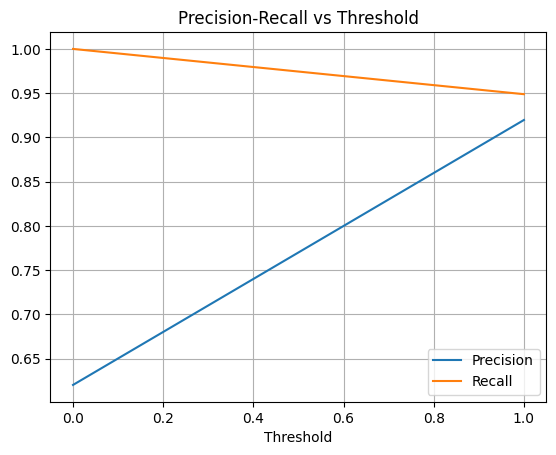

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()


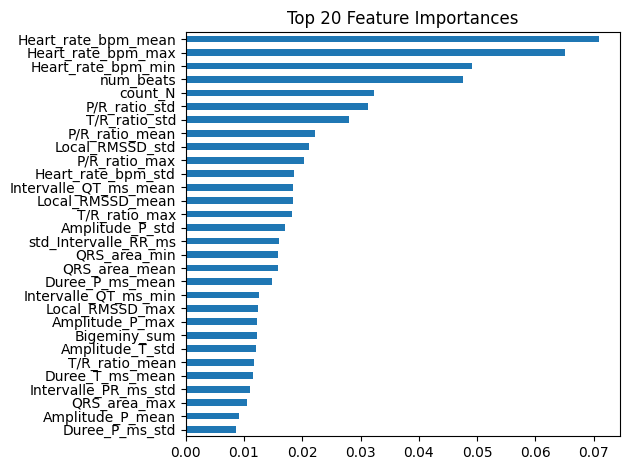

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 20 features
feat_imp.head(30).plot(kind='barh', title='Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


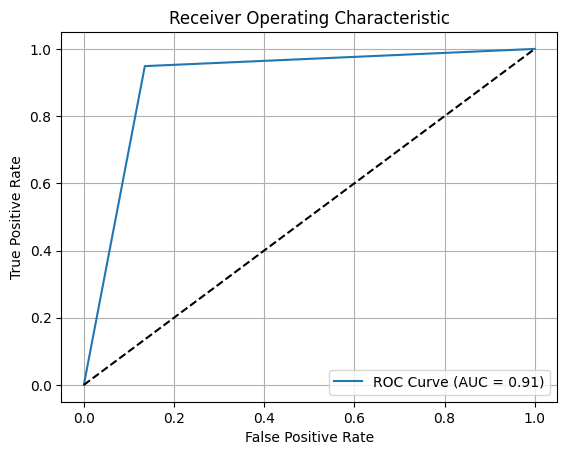

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid()
plt.show()


In [30]:
import joblib

# Save model
joblib.dump(rf_clf, 'normal_vs_abnormal_model.pkl')
print("Model saved successfully!")

Model saved successfully!


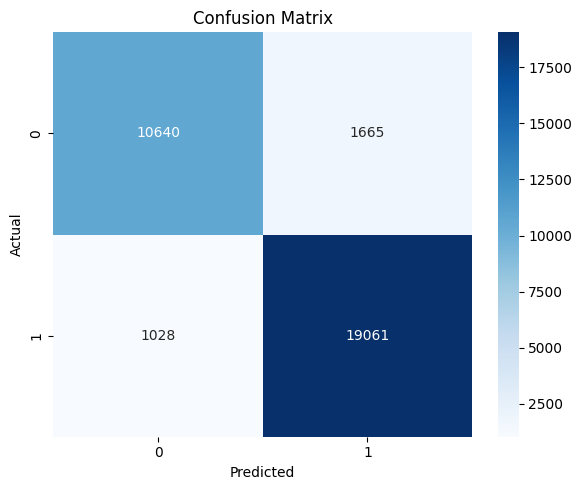

In [31]:
import pandas as pd
import json
from sklearn.metrics import classification_report

# Save predictions
pred_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
pred_df.to_csv('normal_vs_abnormal_predictions.csv', index=False)

# Save metrics
report = classification_report(y_test, y_pred, output_dict=True)
with open("normal_vs_abnormal_classification_report.json", "w") as f:
    json.dump(report, f)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("normal_vs_abnormal_confusion_matrix.png")

# SB

In [32]:
df = sign_df2
df = df.dropna()
df = df[df['Class'] != 0].reset_index(drop=True)
df['Class'] = df['Class'].replace(1, 0)
df['Class'] = df['Class'].replace(2, 1)


print(df['Class'].value_counts())
df_balanced = df

Class
1    60916
0    35104
Name: count, dtype: int64


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column
y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Class
1    60916
0    35104
Name: count, dtype: int64


In [34]:

# Initialize a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9880
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7020
           1       0.99      0.99      0.99     12184

    accuracy                           0.99     19204
   macro avg       0.99      0.99      0.99     19204
weighted avg       0.99      0.99      0.99     19204

[[ 6955    65]
 [  165 12019]]


In [35]:
import joblib

# Save model
joblib.dump(rf_clf, 'sb_vs_else_model.pkl')
print("Model saved successfully!")

Model saved successfully!


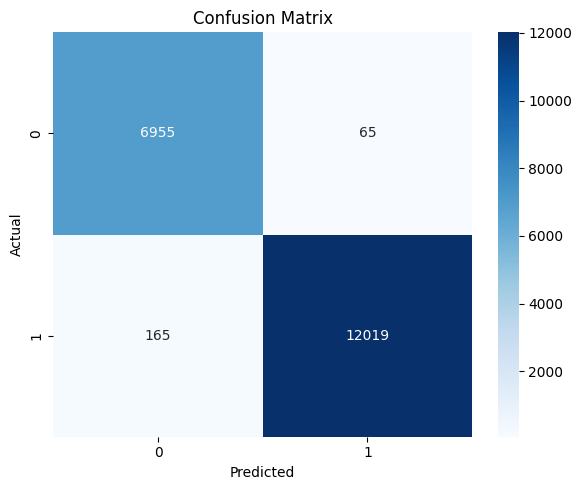

In [36]:
import pandas as pd
import json
from sklearn.metrics import classification_report

# Save predictions
pred_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
pred_df.to_csv('sb_vs_else_predictions.csv', index=False)

# Save metrics
report = classification_report(y_test, y_pred, output_dict=True)
with open("sb_vs_else_classification_report.json", "w") as f:
    json.dump(report, f)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("sb_vs_else_confusion_matrix.png")

# 3 classes

In [37]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = sign_df2
df = df.dropna()
df_balanced = df
# Assuming df_full already has the 'is_normal' column for classification
# Define X and y
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  
y = df_balanced['Class']  # Target: 'is_normal'
print(y.value_counts())
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)



Class
2    60916
0    37004
1    35104
Name: count, dtype: int64


In [38]:

# Initialize a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9085
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      7488
           1       0.90      0.99      0.94      6915
           2       0.93      0.92      0.93     12202

    accuracy                           0.91     26605
   macro avg       0.90      0.91      0.90     26605
weighted avg       0.91      0.91      0.91     26605



# MLP

In [39]:

df_full = sign_df
df_full["Class"].value_counts()

mask = df_full.drop(columns=["Age", "Sex"]).isnull().any(axis=1)
df_with_nulls = df_full[mask]

In [40]:
# Drop those rows from the original dataframe
df_full = df_full[~mask].reset_index(drop=True)

df_full["Class"].value_counts()

Class
0    49102
2    40673
1    18557
Name: count, dtype: int64

In [41]:
df_full['Class'] = df_full['Class'].replace(2, 1)
df_balanced = df_full

df_full["Class"].value_counts()

Class
1    59230
0    49102
Name: count, dtype: int64

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have df_signal_features with features and 'Class' column
X = df_balanced.drop(columns=['record_name','Sex','Age',"Dx",'Class'])  # Features: exclude 'is_normal' column
y = df_full['Class']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Define MLP
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train
mlp.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), random_state=42)

In [43]:

# Evaluate
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8474  1347]
 [ 1421 10425]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      9821
           1       0.89      0.88      0.88     11846

    accuracy                           0.87     21667
   macro avg       0.87      0.87      0.87     21667
weighted avg       0.87      0.87      0.87     21667



In [44]:

joblib.dump(mlp, 'mlp_normal_vs_abnormal_model.pkl')
print("Model saved successfully!")

Model saved successfully!
